<a href="https://colab.research.google.com/github/nitish6121999/Analysis-EDA/blob/main/Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analysis Assignment**

###Geospatial Analysis:

Utilize distribution_centers.csv and users.csv for mapping and analysing the geographic distribution of users and distribution centers.

###User Behaviour Analysis:
Use events.csv to analyse user behaviour, including session patterns, traffic sources, and event types.

###Sales and Revenue Analysis:
Leverage order_items.csv and inventory_items.csv to analyse product sales, revenue, and profitability.

###Product Performance Analysis:
Explore products.csv to analyse product performance, including costs, categories, and popularity.

###User Demographics Analysis:
Use users.csv to analyse user demographics, such as age, gender, and location.

###Order Fulfilment Analysis:
Analyse order_items.csv and orders.csv to understand order fulfilment timelines and status.


These analyses provide insights into user engagement, product performance, and overall ecommerce
operations, aiding in strategic decision-making and business optimization. Do remember to provide
the inferences after every analysis.
Work out these analysis problems in any way you are comfortable with. Do remember to send all
the files which are used to get the outputs.
Also, provide a pdf file containing the graphs and tables with their inferences below.

#Problem Statement


This project focuses on extracting valuable insights from various datasets in the e-commerce domain through comprehensive data-driven analyses. The geographic distribution of users and distribution centers will be mapped using 'distribution_centers.csv' and 'users.csv'. Simultaneously, 'events.csv' will be utilized to analyze user behavior patterns. Sales and revenue dynamics will be explored through the examination of 'order_items.csv' and 'inventory_items.csv', aiding in strategic decision-making. Additionally, 'products.csv' will be scrutinized for insights into product performance. User demographics analysis using 'users.csv' will provide information on age, gender, and location. Lastly, order fulfillment analysis, integrating 'order_items.csv' and 'orders.csv', will offer insights into order processing efficiency. The results of these analyses, along with graphs and tables, will be compiled into a PDF report, empowering stakeholders with actionable insights for optimal business strategies and operational enhancements in the e-commerce landscape.

github link :[ ]

##**1.Geospatial Analysis:**
##Utilize *distribution_centers.csv* and *users.csv* for mapping and analysing the geographic distribution of users and distribution centers.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dc=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/distribution_centers.csv')
users=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/users.csv')

In [ ]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
dc.shape

(10, 4)

In [ ]:
dc.head(10)

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [ ]:
users.shape

(100000, 15)

In [ ]:
users.head(5)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


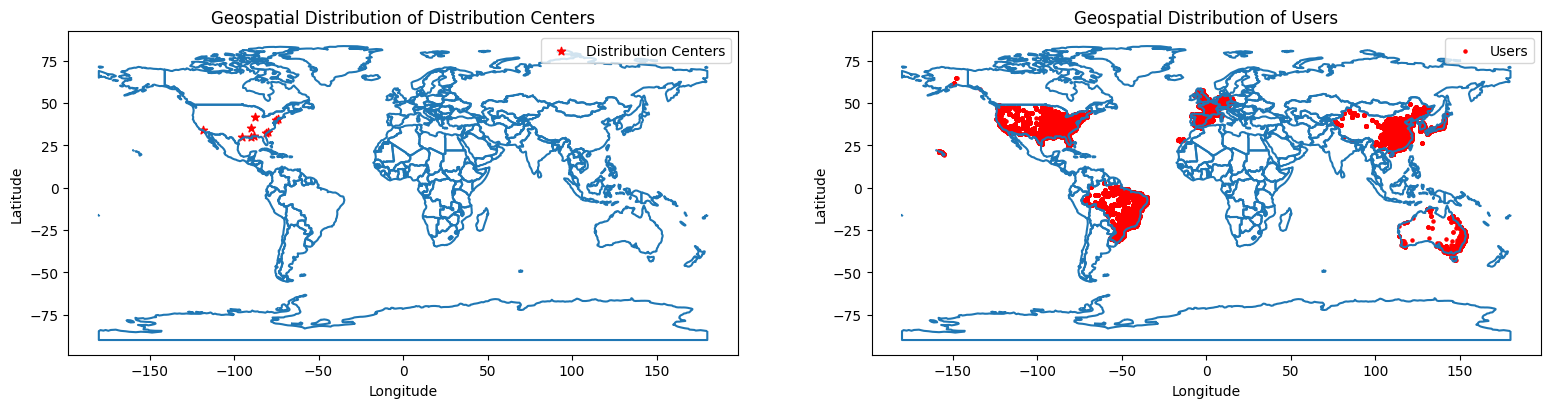

In [ ]:
# Create GeoDataFrame for users
geometry_users = [Point(lon, lat) for lon, lat in zip(users['longitude'], users['latitude'])]
gdf_users = gpd.GeoDataFrame(users, geometry=geometry_users)

# Plot distribution centers and users on separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 8))

# Plot distribution centers
gdf_dc.plot(ax=ax1, color='red', marker='*', label='Distribution Centers')
world.boundary.plot(ax=ax1, linewidth=1.5)
ax1.set_title('Geospatial Distribution of Distribution Centers')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

# Plot users
gdf_users.plot(ax=ax2, color='red', marker='o', markersize=5, label='Users')
world.boundary.plot(ax=ax2, linewidth=1.5)
ax2.set_title('Geospatial Distribution of Users')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.legend()

# Show the plots
plt.show()


Geospatial analysis involves examining spatial data to understand patterns, relationships, and trends related to geographic locations. In the context of your data (users and distribution centers), geospatial analysis will help you visualize and analyze the distribution of users and distribution centers on a map.

* Plotted distribution centers and users on a map.


****************************************************************************************************************************************************************

##**2.User Behaviour Analysis:**
##Use *events.csv* to analyse user behaviour, including session patterns, traffic sources, and event types.

In [ ]:
events=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/events.csv')
print(events.shape)


(2431963, 13)


In [ ]:
events.tail(5)

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase
2431962,844526,64551.0,13,9f633088-d2a8-4db2-8a5e-ebd946abce26,2022-09-15 09:55:32+00:00,190.227.140.196,York,England,YO10,Firefox,Email,/purchase,purchase


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


In [ ]:
events.isnull().sum()

id                       0
user_id            1125671
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23080
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [ ]:
events.dropna(inplace=True)

In [ ]:
events.isnull().sum()

id                 0
user_id            0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
dtype: int64

In [ ]:

# Basic statistics
total_events = events.shape[0]
unique_users = events['user_id'].nunique()
unique_sessions = events['session_id'].nunique()

print(f"Total Events: {total_events}")
print(f"Unique Users: {unique_users}")
print(f"Unique Sessions: {unique_sessions}")

# Temporal analysis
events['created_at'] = pd.to_datetime(events['created_at'])
events['date'] = events['created_at'].dt.date


'''daily_event_count = events.groupby('date').size()
daily_event_count.plot(kind='line', figsize=(12, 6), title='Daily Event Count')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.show()'''


Total Events: 1294116
Unique Users: 79283
Unique Sessions: 180078


"daily_event_count = events.groupby('date').size()\ndaily_event_count.plot(kind='line', figsize=(12, 6), title='Daily Event Count')\nplt.xlabel('Date')\nplt.ylabel('Event Count')\nplt.show()"

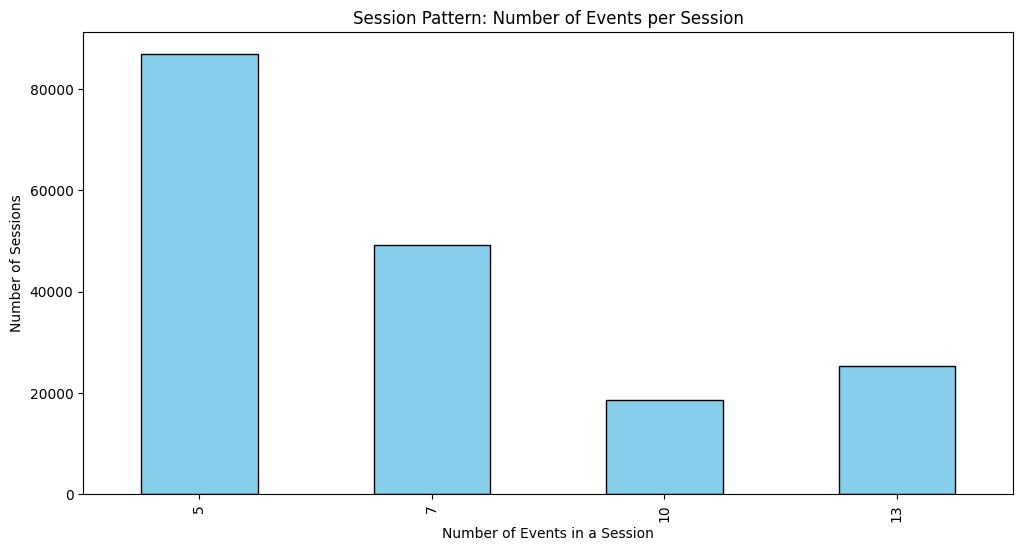

In [ ]:

events['created_at'] = pd.to_datetime(events['created_at'])
events['date'] = events['created_at'].dt.date
events['hour'] = events['created_at'].dt.hour

# Count the number of events per session
session_event_count = events.groupby('session_id').size()

# Plotting session pattern
plt.figure(figsize=(12, 6))
session_event_count.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Session Pattern: Number of Events per Session')
plt.xlabel('Number of Events in a Session')
plt.ylabel('Number of Sessions')
plt.show()


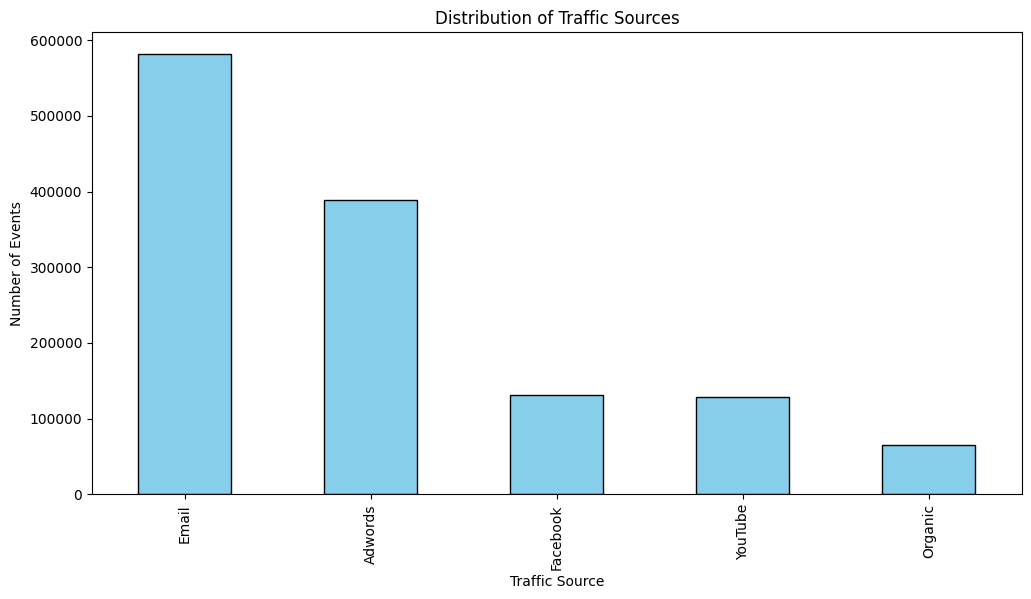

In [ ]:

# Plotting traffic sources
plt.figure(figsize=(12, 6))
events['traffic_source'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Events')
plt.show()


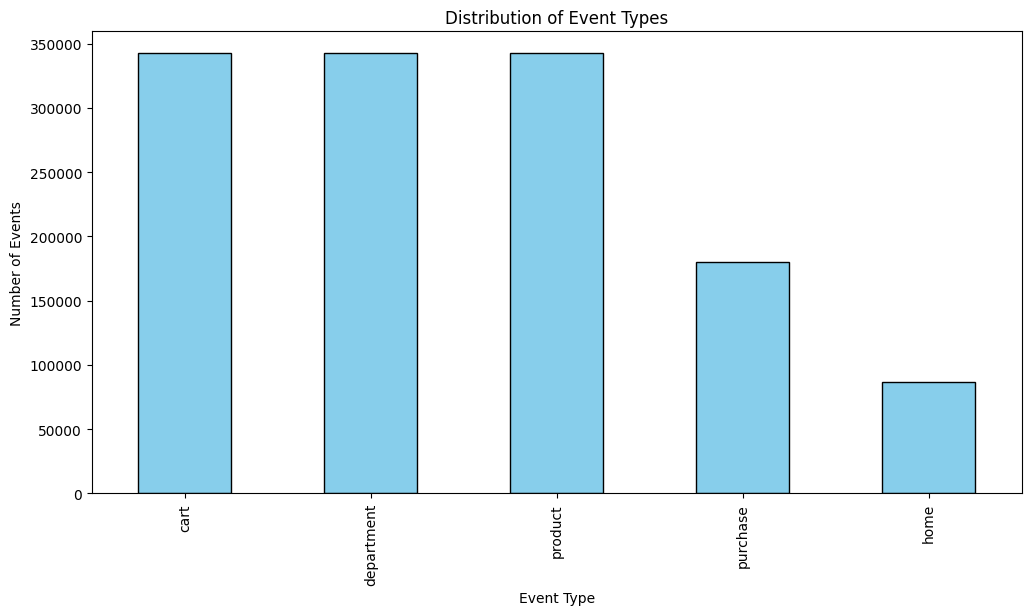

In [ ]:
plt.figure(figsize=(12, 6))
events['event_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.show()

***************************************************************************************************************************************************************

##**3.Sales and Revenue Analysis:**
##Leverage *order_items.csv* and *inventory_items.csv* to analyse product sales, revenue, and profitability.

In [ ]:
order_items1=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/order_items.csv')
inventory_items=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/inventory_items.csv')

In [ ]:
print(order_items1.shape)
print(inventory_items.shape)

(181759, 11)
(490705, 12)


In [ ]:
order_items1.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

In [ ]:
inventory_items.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           308946
cost                                   0
product_category                       0
product_name                          29
product_brand                        401
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [ ]:
merged_data = pd.merge(order_items1, inventory_items, on='product_id', how='inner')

In [ ]:

# Calculate sales, revenue, and profitability
merged_data['sales'] = merged_data['product_retail_price']  # Assuming sales are represented by the retail price
merged_data['revenue'] = merged_data['sales'] - merged_data['cost']
merged_data['profitability'] = (merged_data['revenue'] / merged_data['cost']) * 100

# Analyze product sales and revenue
product_sales = merged_data.groupby('product_name')['sales'].sum()
product_revenue = merged_data.groupby('product_name')['revenue'].sum()
total_profit = merged_data['revenue'].sum() - merged_data['cost'].sum()


# Analyze overall sales and revenue
total_sales = merged_data['sales'].sum()
total_revenue = merged_data['revenue'].sum()
total_profit = merged_data['revenue'].sum() - merged_data['cost'].sum()


print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Revenue: ${total_revenue:.2f}')
print(f'total profit: {total_profit}')

Total Sales: $215035754.37
Total Revenue: $111604113.02
total profit: 8172471.677194953


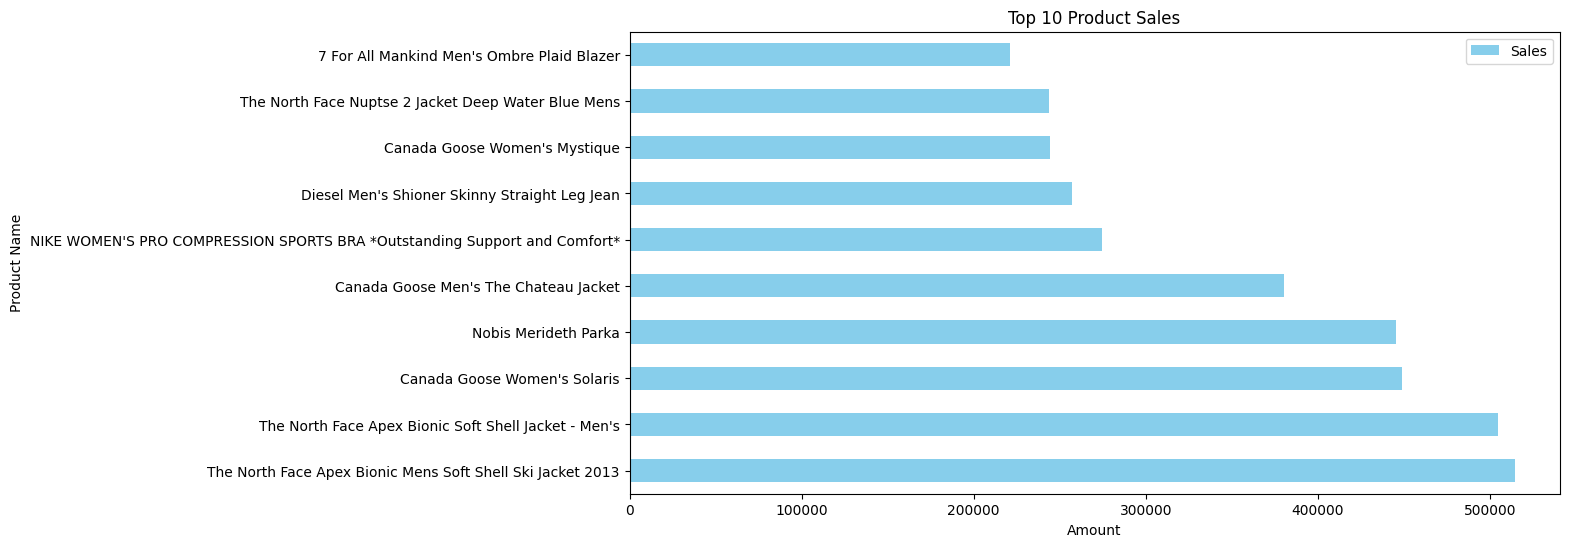

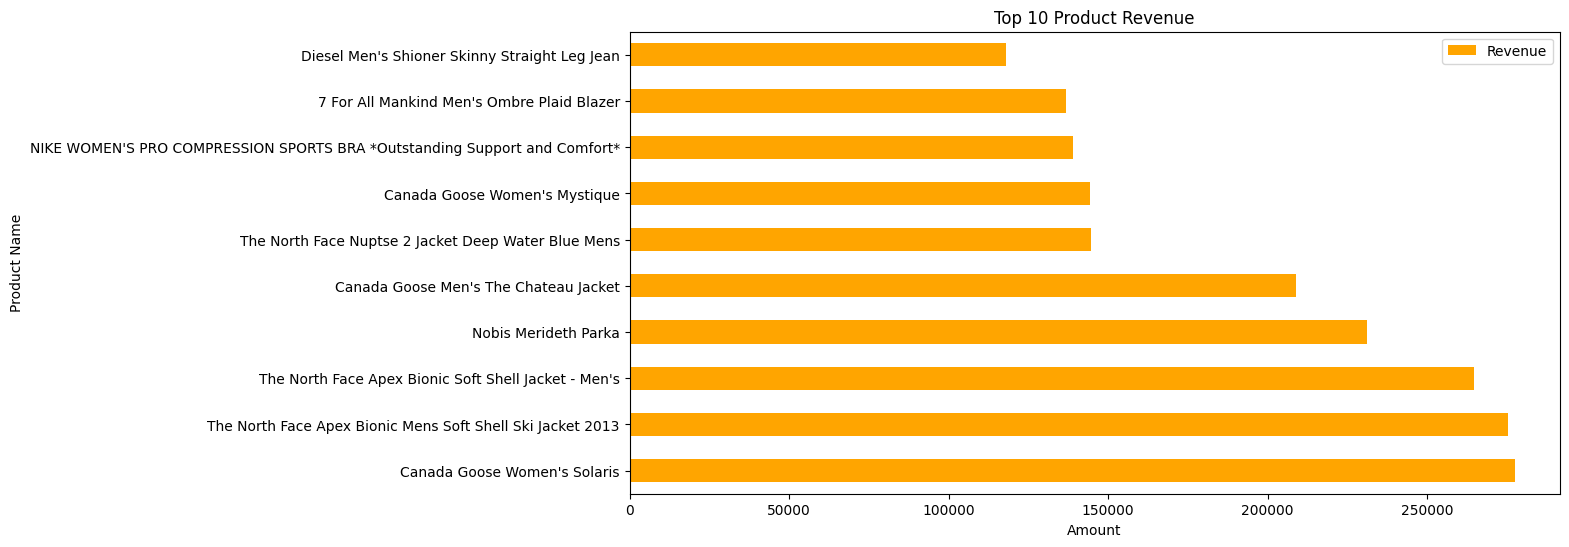

In [ ]:
product_sales = merged_data.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
product_revenue = merged_data.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

# Visualize top 10 product sales
plt.figure(figsize=(12, 6))
product_sales.plot(kind='barh', color='skyblue', label='Sales')
plt.title('Top 10 Product Sales')
plt.ylabel('Product Name')
plt.xlabel('Amount')
plt.legend()
plt.show()

# Visualize top 10 product revenue
plt.figure(figsize=(12, 6))
product_revenue.plot(kind='barh', color='orange', label='Revenue')
plt.title('Top 10 Product Revenue')
plt.xlabel('Amount')
plt.ylabel('Product Name')
plt.legend()
plt.show()


**********************************************************************************************************************************************************************


##**4.Product Performance Analysis:**
##Explore *products.csv* to analyse product performance, including costs, categories, and popularity.

In [ ]:
products=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/products.csv')
products.shape

(29120, 9)

In [ ]:
products.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [ ]:
products.head(5)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [100]:
print(products.info())
print(products.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None
                 id          cost  retail_price  distribution_center_id
count  29120.000000  29120.000000  29120.000000            29120.000000
mean   14560.500000     28.481774     59.220164                4.982898
std     8406.364256     30

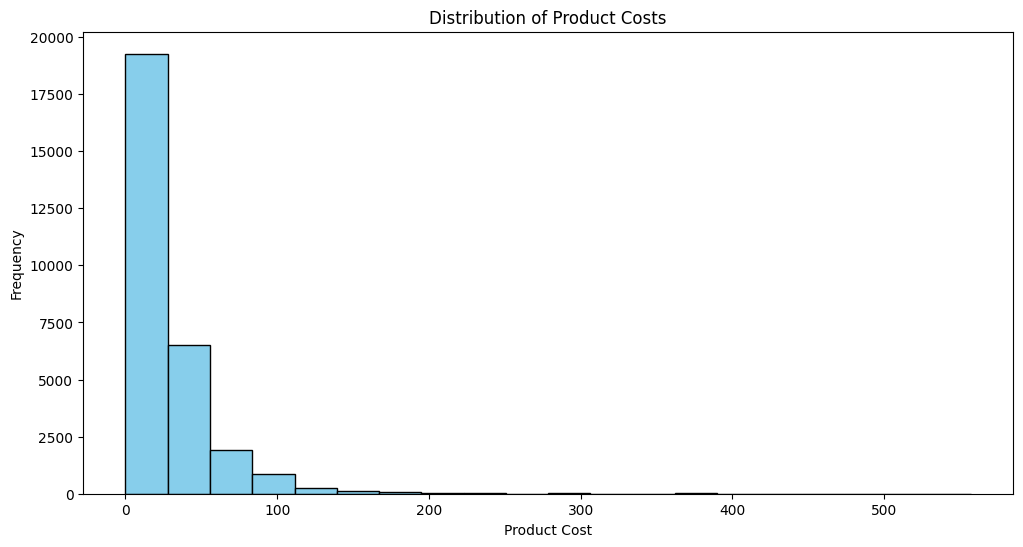

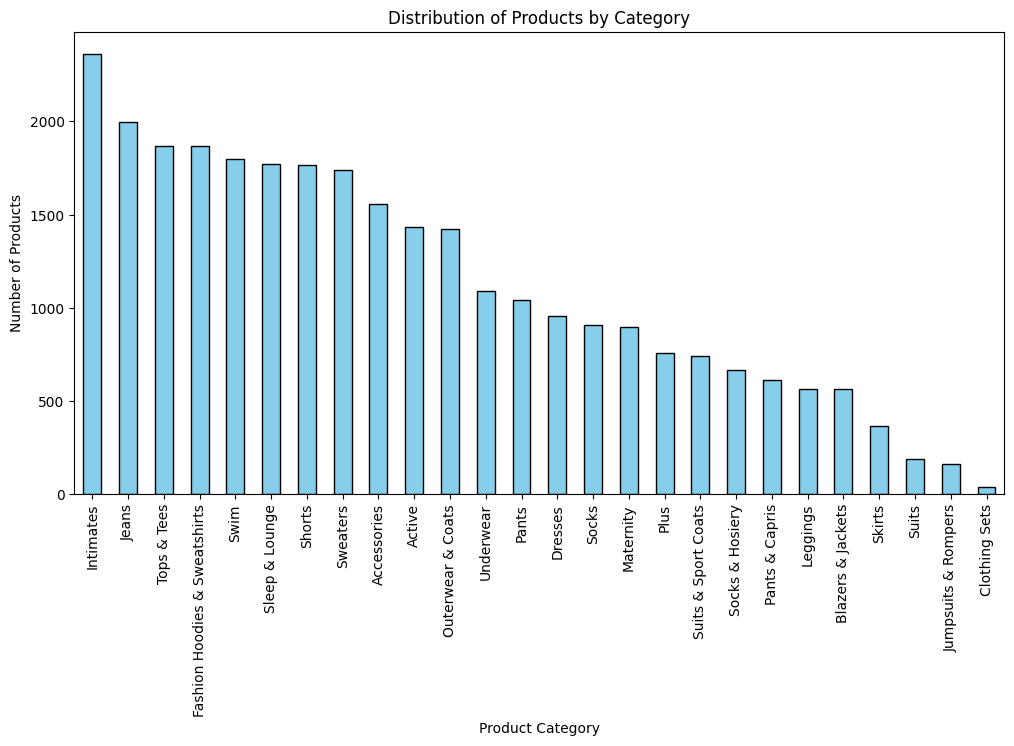

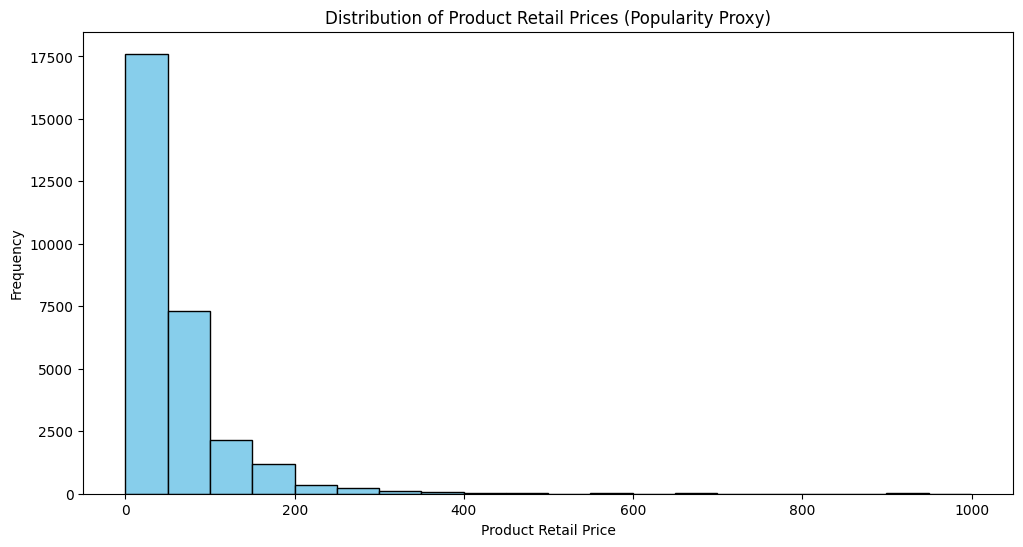

In [101]:
# Product performance analysis
# 1. Cost distribution
plt.figure(figsize=(12, 6))
products['cost'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Costs')
plt.xlabel('Product Cost')
plt.ylabel('Frequency')
plt.show()

# 2. Category distribution
category_counts = products['category'].value_counts()
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.show()

# 3. Popularity (assuming retail price as a proxy)
plt.figure(figsize=(12, 6))
products['retail_price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Retail Prices (Popularity Proxy)')
plt.xlabel('Product Retail Price')
plt.ylabel('Frequency')
plt.show()


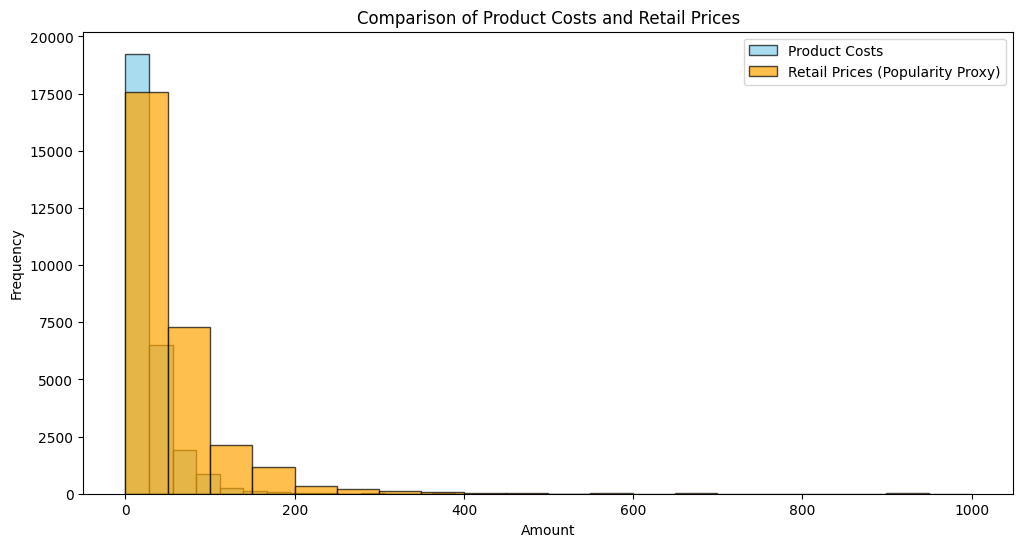

In [104]:

products = products.dropna(subset=['name', 'brand'])

# Visualize the comparison of product costs and retail prices
plt.figure(figsize=(12, 6))

# Histogram for Product Costs
plt.hist(products['cost'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Product Costs')

# Histogram for Product Retail Prices (Popularity Proxy)
plt.hist(products['retail_price'], bins=20, color='orange', edgecolor='black', alpha=0.7, label='Retail Prices (Popularity Proxy)')

plt.title('Comparison of Product Costs and Retail Prices')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


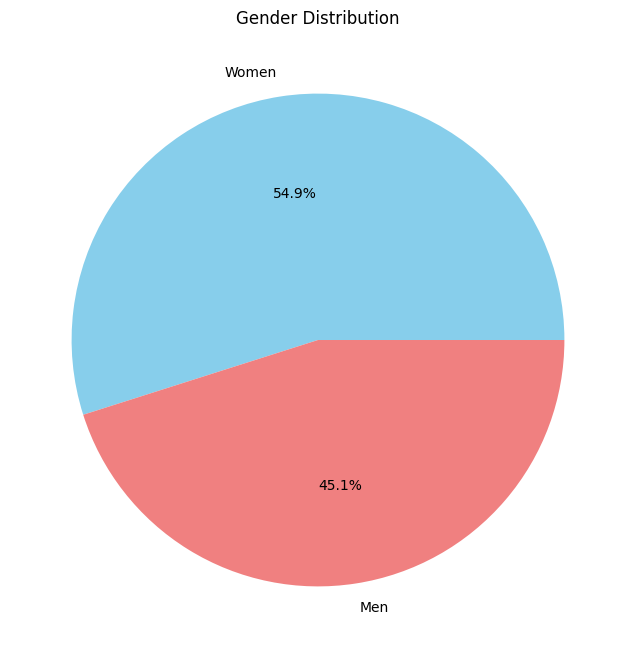

In [ ]:

# Count the number of occurrences for each gender
gender_counts = products['department'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


************************************************************************************************************************************************************

##**5.User Demographics Analysis:**
##Use users.csv to analyse user demographics, such as age, gender, and location.

In [ ]:
users.isnull().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

In [ ]:
users.head(5)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [106]:
print(users.info())
print(users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB
None
                  id            age    

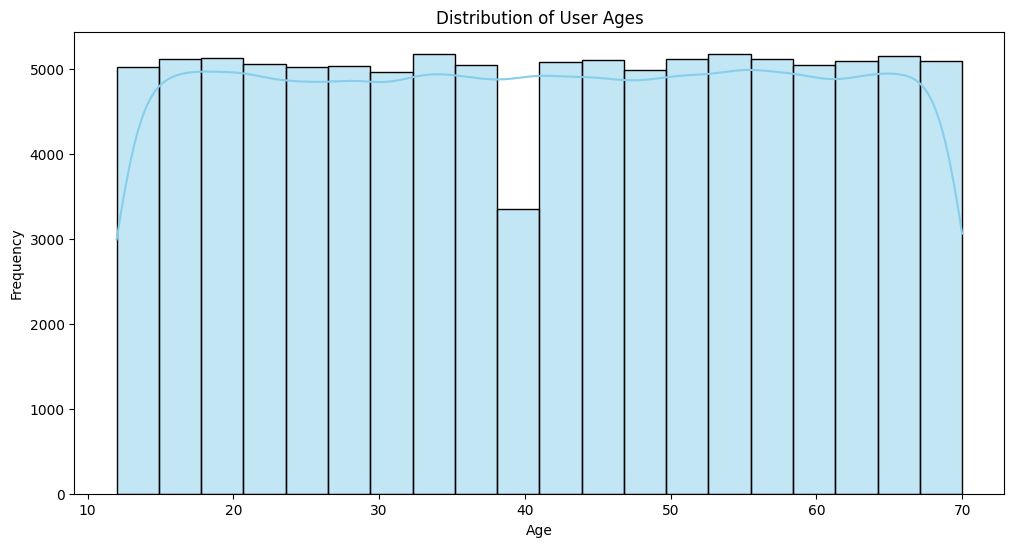

In [105]:
import seaborn as sns


# Analyze user demographics

# 1. Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(users['age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



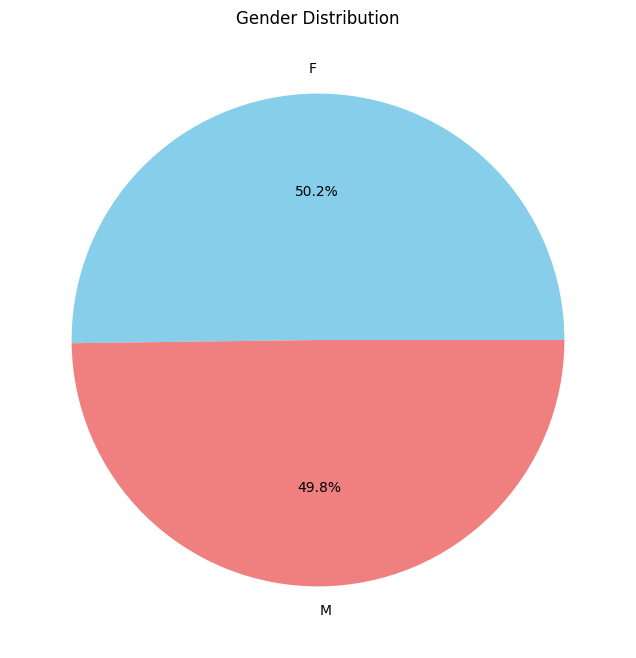

In [107]:
# 2. Gender distribution
gender_counts = users['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()



<ipython-input-121-151787aae8c4>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


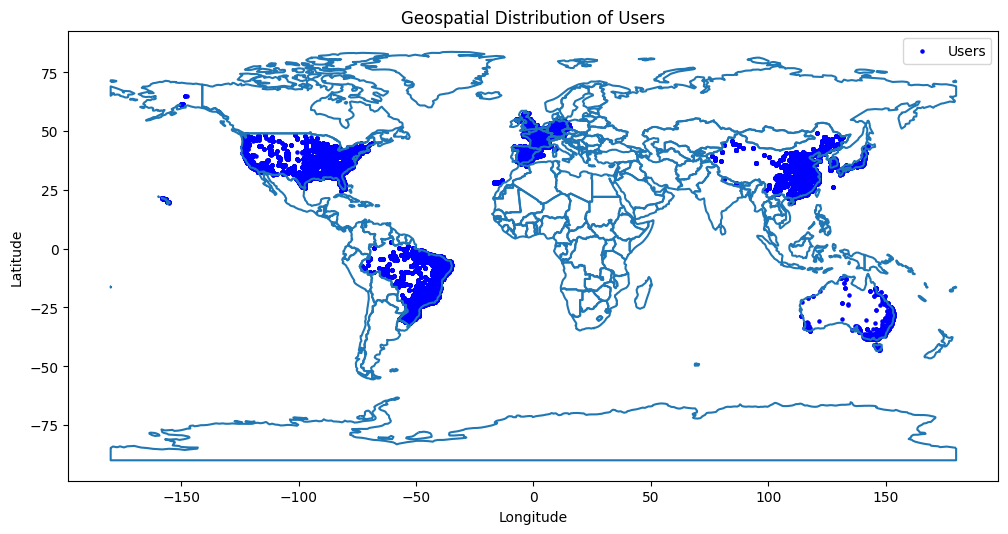

In [121]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'users'
# Replace 'users' with the actual variable name if different

# Create GeoDataFrame for users
geometry_users = [Point(lon, lat) for lon, lat in zip(users['longitude'], users['latitude'])]
gdf_users = gpd.GeoDataFrame(users, geometry=geometry_users)

# Plot users on the subplot with gender differentiation
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all users with a single color for simplicity
gdf_users.plot(ax=ax, color='blue', marker='o', markersize=5, label='Users')

# Plotting world map for context
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1.5)

# Set labels and title
plt.title('Geospatial Distribution of Users')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend()

# Show the plot
plt.show()


***************************************************************************************************************************************************************

##**6.Order Fulfilment Analysis:**
##Analyse order_items.csv and orders.csv to understand order fulfilment timelines and status.

In [ ]:
order_items2=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/order_items.csv')
print(order_items2.shape)

(181759, 11)


In [ ]:
order_items2.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

In [ ]:
orders=pd.read_csv('/content/drive/MyDrive/Access file/collegedunia/data/orders.csv')
orders.shape

(125226, 9)

In [ ]:
orders.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64

In [ ]:
# Merge based on 'order_id'
merged_data = pd.merge(order_items2, orders, on='order_id', how='inner')
print(merged_data.shape)
# Display the merged DataFrame
merged_data.head(5)


In [ ]:
merged_data.isnull().sum()

id                        0
order_id                  0
user_id_x                 0
product_id                0
inventory_item_id         0
status_x                  0
created_at_x              0
shipped_at_x          63478
delivered_at_x       117918
returned_at_x        163527
sale_price                0
user_id_y                 0
status_y                  0
gender                    0
created_at_y              0
returned_at_y        163527
shipped_at_y          63478
delivered_at_y       117918
num_of_item               0
dtype: int64

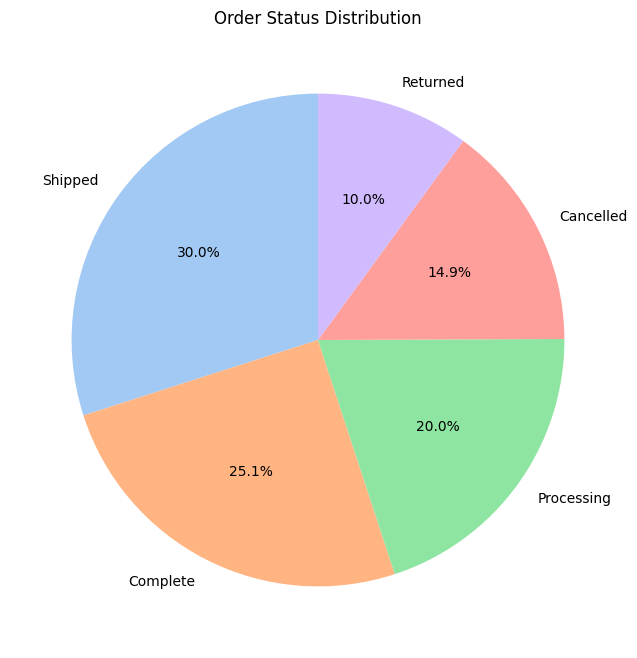

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'concatenated_data' is your merged DataFrame

# Plotting a pie chart for order status distribution
plt.figure(figsize=(8, 8))
merged_data['status_x'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.ylabel('')  # Remove the default ylabel with percentage
plt.show()


In [ ]:


# Convert date columns to datetime format
merged_data['created_at_x'] = pd.to_datetime(merged_data['created_at_x'])
merged_data['shipped_at_x'] = pd.to_datetime(merged_data['shipped_at_x'])
merged_data['delivered_at_x'] = pd.to_datetime(merged_data['delivered_at_x'])
merged_data['returned_at_x'] = pd.to_datetime(merged_data['returned_at_x'])

# Filter for orders with status 'completed'
completed_orders = merged_data[merged_data['status_x'] == 'Complete']

# Calculate the time taken for delivery
completed_orders['delivery_time'] = completed_orders['delivered_at_x'] - completed_orders['shipped_at_x']


<ipython-input-43-165b2ad3b9fb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['delivery_time'] = completed_orders['delivered_at_x'] - completed_orders['shipped_at_x']


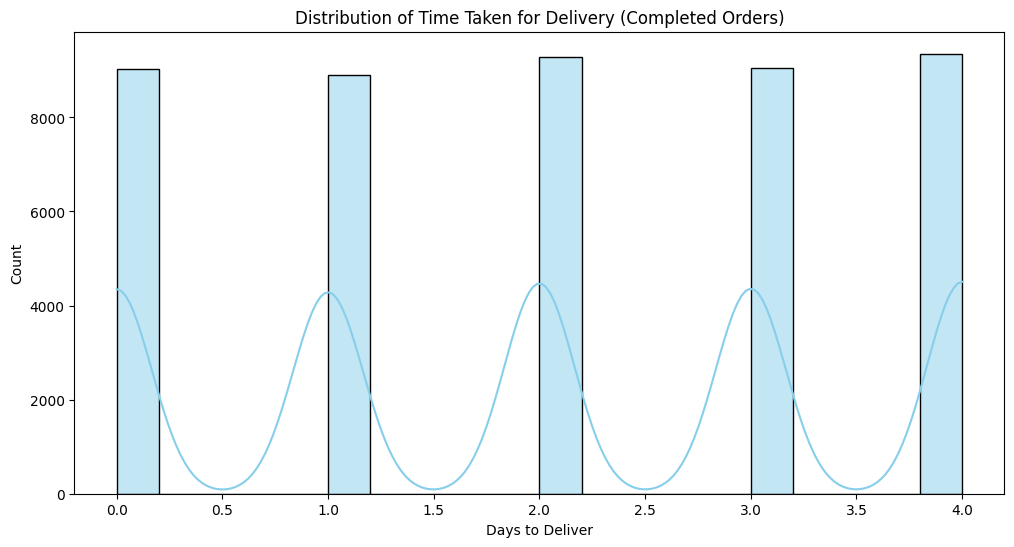

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(completed_orders['delivery_time'].dt.days, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time Taken for Delivery (Completed Orders)')
plt.xlabel('Days to Deliver')
plt.ylabel('Count')
plt.show()